# Qiskit First Steps

## Project 1: Half Adder

**Hi there!**

This is my first project in **Qiskit** and I have decided to go with a simple half adder that performs binary addition for two qubits. I will do the first run on a simulator on my laptop and then run it on a real quantum comupter made available by **IBM**.

So,<br>
**LET'S GET INTO IT!**

First we import the necessary modules, that would be **qiskit** and **qiskit.visualization** in this case. We shall use the following from each of these module(s):
- From Qiskit, we use Aer, QuantumCircuit and execute
    - **Aer** is to intialize a backend for our quantum circuit
    - **QuantumCircuit** is to intialize our circuit and add the necessary gates.
    - **execute** to run our circuit and get the results
- From qiskit.visualization, we have the plot_histogram
    - **plot_histogram** is used to generate a plot for probabilites of all output states possible.

In [1]:
from qiskit import Aer, QuantumCircuit, execute
from qiskit.visualization import plot_histogram

### Case 1: Ideal Results
Now we add a simulator for our circuit. I am using the **'qasm_simulator'** as it acts like a ideal quantum computer and I want ideal result for now.

In [2]:
qasm = Aer.get_backend('qasm_simulator')

Here, we initialize **QuantumCircuit** object and add he necessary gates. Then I enclose it all inside a function just for the sake of obtaining all outputs for all combinations of inputs.

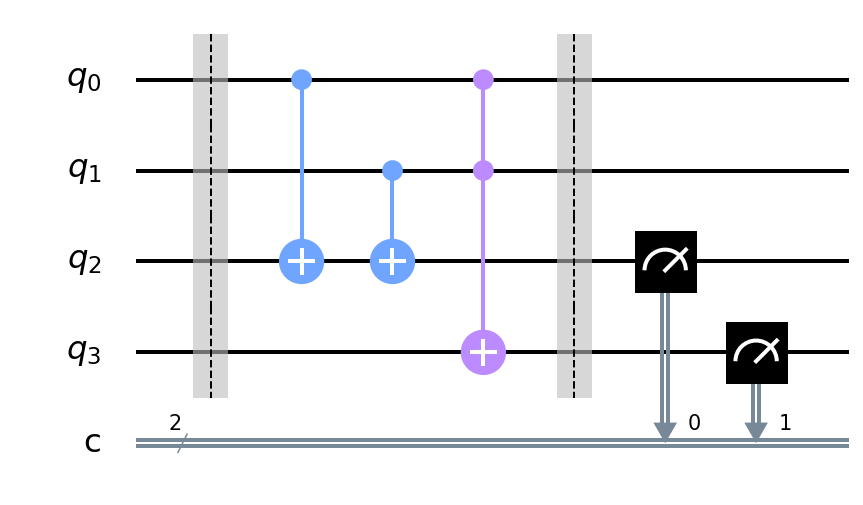

In [3]:
def half_adder(a=0, b=0):
    '''
    The function requires two inputs in binary digits 
    and returns a circuit that computes their addition
    using half adder circuit implemented using quantum 
    multi qubit gates.
    '''
    circuit = QuantumCircuit(4, 2)
    
    if a == 1:
        circuit.x(0)
    if b == 1:
        circuit.x(1)
    if a == 0.5:
        circuit.h(0)
    if b == 0.5:
        circuit.h(1)

    circuit.barrier()
    circuit.cx(0,2)
    circuit.cx(1,2)
    circuit.ccx(0,1,3)
    circuit.barrier()

    circuit.measure(2,0)
    circuit.measure(3,1)
    
    return circuit

_ = half_adder()
_.draw('mpl', scale=2)

In [4]:
ideal_counts = []
for i in range(4):
    a = int(input('Enter A:'))
    b = int(input('Enter B:'))
    ha = half_adder(a, b)
    result = list(execute(ha, qasm).result().get_counts().keys())
    print('Input               : {} + {}'.format(a, b))
    print('Result              : {}\n'.format(result[0]))
    ideal_counts.append(execute(ha, qasm).result().get_counts())

ideal_counts.remove(ideal_counts[2])
ideal_counts

Enter A:0
Enter B:0
Input               : 0 + 0
Result              : 00

Enter A:0
Enter B:1
Input               : 0 + 1
Result              : 01

Enter A:1
Enter B:0
Input               : 1 + 0
Result              : 01

Enter A:1
Enter B:1
Input               : 1 + 1
Result              : 10



[{'00': 1024}, {'01': 1024}, {'10': 1024}]

We see that for each run, all the shots specified by default landed on the output viz the right answer for that particular iteration with given vakues of A and B. This is what one can expect of a simulator as it is programmed to behave ideally. Well then let's put the each state in a superposition using the **Hadamard** gate.

In [5]:
ideal_counts = {}
ha = half_adder(0.5, 0.5)
result = list(execute(ha, qasm).result().get_counts().keys())
ideal_counts.update(execute(ha, qasm).result().get_counts())
ideal_counts

{'00': 261, '01': 503, '10': 260}

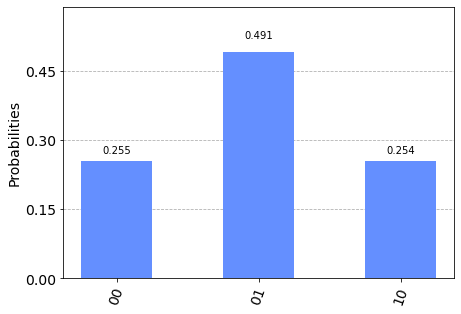

In [6]:
plot_histogram(ideal_counts)

### Case 2: Real Results
Finally, we shall run this on a real quantum computer. For my code, I have chosen the IBMQ Backend **"ibmq_valencia"**. There are many other backends available, you can check using the command given below:

In [7]:
from qiskit import IBMQ
IBMQ.load_account() 
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

e:\anaconda3\envs\qiskit\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [8]:
ibmq = provider.get_backend("ibmqx2")

In [9]:
real_counts = {}
ha = half_adder(0.5, 0.5)
result = list(execute(ha, ibmq).result().get_counts().keys())
real_counts.update(execute(ha, qasm).result().get_counts())
real_counts

{'00': 258, '01': 495, '10': 271}

As you can see, the loop above takes some time to run in each iteration. This is because the code is sent to a IBMQ backend to run it on a real quantum computer. So, If you are lucky, you'll get your results in no time. But if you are not so lucky, it could take a few minutes or more if there are other people using it (i.e. your "job" is "queued"). 
So, be sure to check the backends before you use so that you can access the least busy one.

Now, we can plot the histogram based on the results.

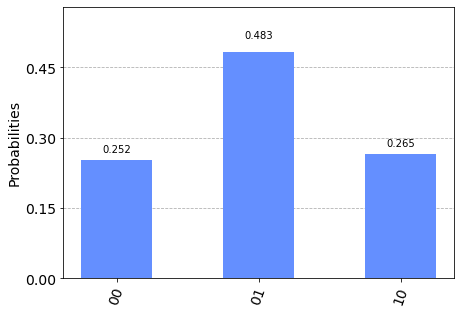

In [10]:
plot_histogram(real_counts)

### Conclusion 

Let us compare the results above:
- In the ideal case, we have a ideal quantum computer (or atleast a simulator of one) that is **free of noise**. The plot shows that the output **01** is twice as likely to happen as compared to **00** and **11**. This is becuase input A = 0 and B = 1 and vice versa which yield the same state **|01>**.
- In the real case, **our results align with the ideal case pretty well. This means that the backend works approxiamtely as an ideal quantum computer in the case of a half-adder circuit**. But we have to remember that in reality, **noise is introduced every time a gate acts on qubit(s)**. In some case the noise is more for certain gates and less for other gates.

Thank you all for visiting my code, I hope it was helpful in some way. See you around as I shall be sharing more code with increasing complexity of the topics I deal with as I learn more. If you wish to contact me, here are my details:

**Name :** Saurabh Singh Bajeli<br>
**Email:** kaori.sarin@gmail.com

NOTE: Wanna give a feedback, suggestions or corrections? feel free to reach me using the above mentioned contact details.